In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math
import random
from bitarray import bitarray
from bitarray.util import int2ba, ba2int

In [2]:
random.seed(15)
np.random.seed(15)

$$
f\left(x_{1}, x_{2}\right)=\sin \left(10 x_{1}\right)+x_{1} \cos \left(2 \pi x_{2}\right)
$$

$$
x_{1} \in[-2,2], x_{2} \in[0,1]
$$

$$f \to min $$

### Minimization based on binary individuals

## GA for single dimension minimization

### Transformation

### Evaluation

In [3]:
# ready
def bestOfPopulationt(population):
  scores = [evaluate(x) for x in population]
  
  best_index = np.argmin(scores)
  
  return population[best_index], scores[best_index]

### Modification

In [4]:
# ready
def mutate(x):
  index = np.random.randint(n)
  
  mutated = x.copy()
  mutated[index] = not mutated[index]
  
  return mutated

In [5]:
# ready
def crossbreed(mom, dad):
  index = np.random.randint(n)
  
  return (mom[:index] + dad[index:], dad[:index] + mom[index:])

### Selection

In [6]:
# ready
def cultivateFrom(population: list):
  new_population = []
  N = len(population)
  
  for _ in range(N//2):

    mom = roundOfTournament(population)
    dad = roundOfTournament(population)

    if shouldMutate():
      mom = mutate(mom)
      dad = mutate(dad)

    if shouldCross():
      mom, dad = crossbreed(mom, dad)

    new_population.append(mom)
    new_population.append(dad)

  return new_population

# ready
def roundOfTournament(population: list):
  participants = random.sample(population, N_t)
  
  winner, _ = bestOfPopulationt(participants)

  return winner

# ready
def shouldMutate():
  return np.random.choice([True, False], p=[p_mutate, 1 - p_mutate])

# ready
def shouldCross():
  return np.random.choice([True, False], p=[p_cross, 1 - p_cross])

### Problem

$$
f\left(x_{1}, x_{2}\right)=\sin \left(10 x_{1}\right)+x_{1} \cos \left(2 \pi x_{2}\right)
$$

$$
x_{1} \in[-2,2], x_{2} \in[0,1]
$$

In [7]:
def plotContour(f, argmin=None, mesh_step=50):
  x = np.linspace(x1_int[0], x1_int[1], mesh_step)
  y = np.linspace(x2_int[0], x2_int[1], mesh_step)
  
  X, Y = np.meshgrid(x, y)
  Z = f(X,Y)
  
  fig = plt.figure(figsize=(7,4))
  ax = fig.add_subplot()
  
  cs = ax.contourf(X, Y, Z)

  cbar = fig.colorbar(cs)

  if(argmin != None):
    f_min = f(*argmin)
    ax.plot([argmin[0]], [argmin[1]], 'r*', label=r'$f(x) = min $')
  
  plt.show()

In [9]:
f = lambda x1, x2: np.sin(10*x1) + x1*np.cos(2*np.pi*x2)

x1_int = [-2, 2]
x2_int = [0.2, 0.8]
#x2_int = [0, 1]

In [10]:
h_x1 = 1e-5
h_x2 = 1e-5

n_x1 = len(int2ba(int((x1_int[1] - x1_int[0])/h_x1)))
n_x2 = len(int2ba(int((x2_int[1] - x2_int[0])/h_x2)))

n = n_x1 + n_x2
n

35

In [11]:
n_xs = [n_x1, n_x2]
x_ints = [x1_int, x2_int]

In [12]:
# GA parameters
N = 1000
max_iterations = 50
max_iterations_without_evolution = 10
p_mutate = 0.9
p_cross = 0.5
N_t = 3

### GA

In [13]:
print( n_xs, x_ints)

[19, 16] [[-2, 2], [0.2, 0.8]]


In [34]:
# ready
# changed
def evaluate(x):
  #print(M(x, [n_x1, n_x2], [x1_int, x2_int]))
  return f(*M(x, n_xs, x_ints))

In [35]:
# changed
def M(x, n_xs: list, x_ints: list):
  #print(x)
  #print(n_xs, x_ints)
  xs = []
  pointer = 0
  
  for n_xi, x_inti in zip(n_xs, x_ints):
    xs.append(M_single(x[pointer:pointer+n_xi], x_inti))
    
    # len xi
    pointer += n_xi
  
  return xs

# new
def M_single(x, x_int):
  #print(x)
  #return (x_interval[1] - x_interval[0]) / (2**n - 1) * ba2int(x) + x_interval[0]
  #return h_x * ba2int(x) + x_interval[0]
  d = 0
  for i, b in enumerate(x):
    if b:
      d += 2 ** i

  return (x_int[1] - x_int[0]) / (2 ** len(x) - 1) * d + x_int[0]

In [36]:
population = [bitarray(n) for _ in range(N)]
iterations_without_evolution = 0
best_from_populations = []
scores = []
best_score = bestOfPopulationt(population)

for i in range(max_iterations):

  print(i)
  
  best, population_score = bestOfPopulationt(population)
  
  best_from_populations.append(best)
  scores.append(population_score)
  
  # TODO (first population)
  if scores[-1] == population_score:
    iterations_without_evolution += 1
  else:
    iterations_without_evolution = 0
  
  population = cultivateFrom(population)

  
all_time_best, minimum = bestOfPopulationt(best_from_populations)

(all_time_best, minimum)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


(bitarray('00110011100111101110000000000000001'), -2.7328801379233796)

In [37]:
best_from_populations

[bitarray('00000000000000000000000000000000000'),
 bitarray('11110000111111101110101001000110011'),
 bitarray('01110000110110101110110001000111001'),
 bitarray('00000000100111101110100101000111010'),
 bitarray('00010000101011101110101101000101110'),
 bitarray('00011000101011101110101101000101110'),
 bitarray('10000000011011101110101001000111110'),
 bitarray('00000100100111101110100101000111110'),
 bitarray('00001000101111101110100100001000001'),
 bitarray('11110000100111101111101000100111110'),
 bitarray('01010111000111101110100100001000001'),
 bitarray('10000010010111101110101001000000001'),
 bitarray('11010110100111101110100101101111110'),
 bitarray('11101000100111101110100101000000001'),
 bitarray('00010100100111101111101101111111110'),
 bitarray('01100000010111101110000001000000001'),
 bitarray('00000011100111101110100100000000001'),
 bitarray('00000011100111101110100100000000001'),
 bitarray('00000011100111101110110100000000001'),
 bitarray('10001011100111101110100100000000001'),


In [38]:
M(all_time_best, n_xs, x_ints)

[1.7378916509469051, 0.5000045777065691]

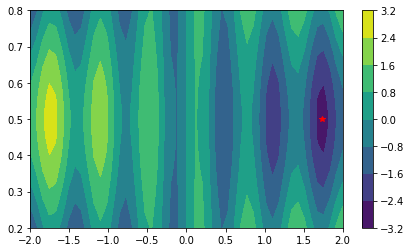

In [39]:
plotContour(f, argmin=M(all_time_best, n_xs, x_ints))

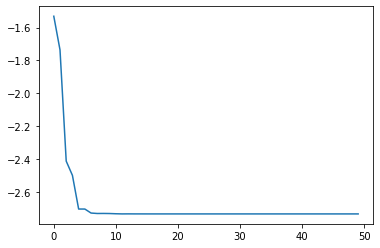

In [40]:
plt.plot([i for i in range(len(scores))],scores)